## Dual Annealing Hyperparameter Experiments Pipeline

In [529]:
%pwd
%cd ../..

/


In [530]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from deeplifting.problems import PROBLEMS_BY_NAME
from deeplifting.optimization import run_dual_annealing

In [531]:
# lists of hyperparameter values to test
init_temp_vals = [0.01, 0.1, 1, 10, 100, 1000, 5000, 10000, 25000, 50000]
res_temp_vals = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.25, 0.5, 0.75, 0.99]
vis_vals = [1.05, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 2.95]
acpt_vals = [-9.999e3, -1e3, -1e2, -1e1, 0, -1, -2, -3, -4, -5]

In [532]:
# initialize problem to test
problem_name = 'rosenbrock'
problem = PROBLEMS_BY_NAME[problem_name]
global_minimum = problem['global_minimum']
print('Global minimum: {}'.format(global_minimum))

Global minimum: 0.8049


In [533]:
# create new directory to store results if none exists
import os

parent_dir = '/home/seanschweiger/dl_testing/Deeplifting/images/dual_annealing/'
path = os.path.join(parent_dir, problem_name)

if not os.path.exists(path):
    os.mkdir(path)

### Initial Temperature Experiment

In [534]:
init_temp_results = pd.DataFrame()
for i in range(len(init_temp_vals)):
    outputs = run_dual_annealing(problem, trials=10, init_temp=init_temp_vals[i])
    fn_results = []
    for j in range(len(outputs['final_results'])):
        fn_results.append(outputs['final_results'][j][-1])
    init_temp_results[init_temp_vals[i]] = fn_results

In [535]:
init_temp_results

,0.01,0.10,1.00,10.00,100.00,1000.00,5000.00,10000.00,25000.00,50000.00
0,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
1,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
2,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
3,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
4,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
5,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
6,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
7,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
8,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
9,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903


In [536]:
# for i in range(len(init_temp_vals)):
#     print(init_temp_results[init_temp_vals[i]].value_counts())

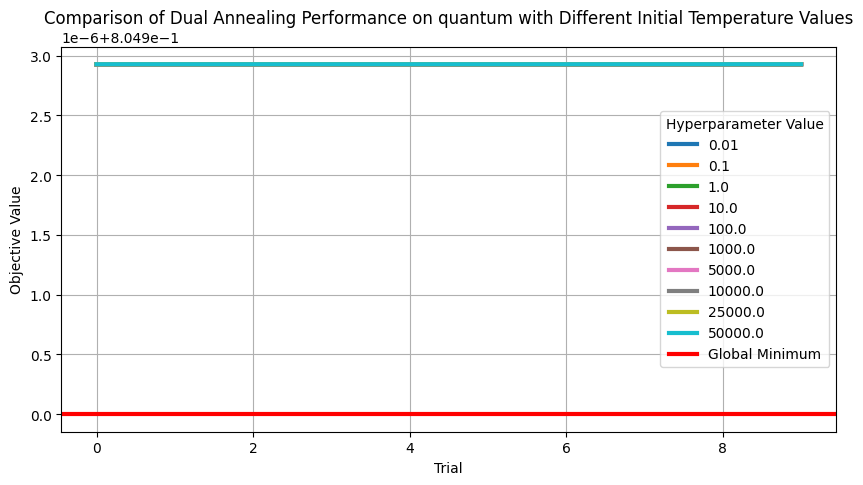

In [537]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
init_temp_results[init_temp_vals].plot(lw=3, figsize=(10, 5), ax=ax)
ax.axhline(global_minimum, color='red', lw=3, label='Global Minimum')

ax.set_title(
    f'Comparison of Dual Annealing Performance on {problem_name} with Different Initial Temperature Values'
)
ax.set_xlabel('Trial')
ax.set_ylabel('Objective Value')
ax.grid()
ax.legend(title='Hyperparameter Value')

fig.savefig(
    f'/home/seanschweiger/dl_testing/Deeplifting/images/dual_annealing/{problem_name}/init_temp.png'
)

### Restart Temperature Ratio Experiments

In [538]:
res_temp_results = pd.DataFrame()
for i in range(len(res_temp_vals)):
    outputs = run_dual_annealing(problem, trials=10, res_temp=res_temp_vals[i])
    fn_results = []
    for j in range(len(outputs['final_results'])):
        fn_results.append(outputs['final_results'][j][-1])
    res_temp_results[res_temp_vals[i]] = fn_results

In [539]:
res_temp_results

,0.000001,0.000010,0.000100,0.001000,0.010000,0.100000,0.250000,0.500000,0.750000,0.990000
0,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
1,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
2,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
3,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
4,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
5,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
6,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
7,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
8,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
9,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903


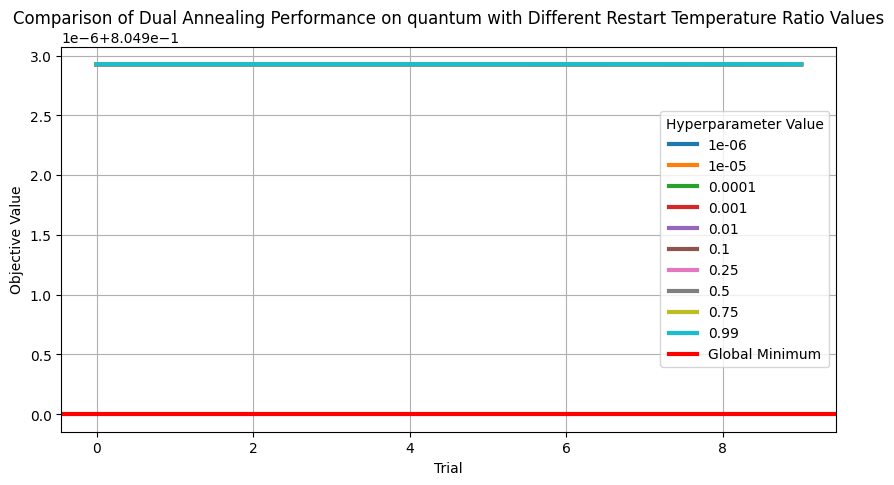

In [540]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
res_temp_results[res_temp_vals].plot(lw=3, figsize=(10, 5), ax=ax)
ax.axhline(global_minimum, color='red', lw=3, label='Global Minimum')

ax.set_title(
    f'Comparison of Dual Annealing Performance on {problem_name} with Different Restart Temperature Ratio Values'
)
ax.set_xlabel('Trial')
ax.set_ylabel('Objective Value')
ax.grid()
ax.legend(title='Hyperparameter Value')

fig.savefig(
    f'/home/seanschweiger/dl_testing/Deeplifting/images/dual_annealing/{problem_name}/res_temp.png'
)

### Visiting Distribution Experiments

In [541]:
vis_results = pd.DataFrame()
for i in range(len(vis_vals)):
    outputs = run_dual_annealing(problem, trials=10, vis=vis_vals[i])
    fn_results = []
    for j in range(len(outputs['final_results'])):
        fn_results.append(outputs['final_results'][j][-1])
    vis_results[vis_vals[i]] = fn_results

In [542]:
vis_results

,1.05,1.25,1.50,1.75,2.00,2.25,2.50,2.75,2.95
0,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
1,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
2,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
3,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
4,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
5,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
6,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
7,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
8,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
9,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903


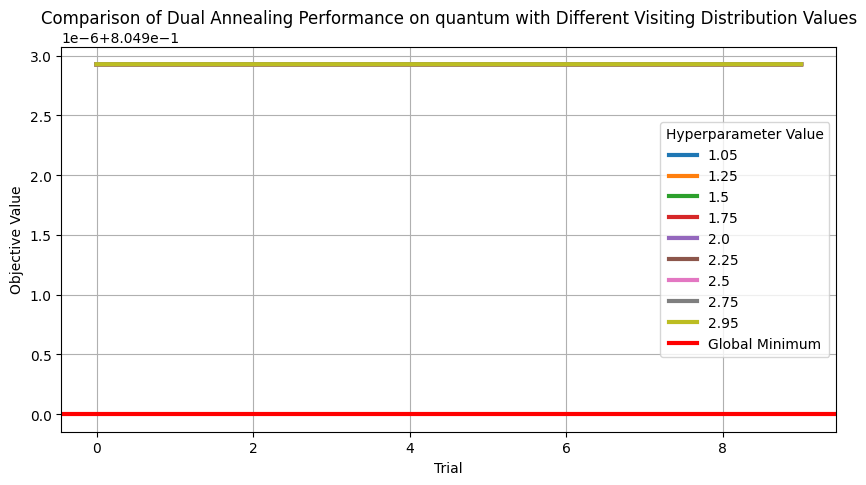

In [543]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
vis_results[vis_vals].plot(lw=3, figsize=(10, 5), ax=ax)
ax.axhline(global_minimum, color='red', lw=3, label='Global Minimum')

ax.set_title(
    f'Comparison of Dual Annealing Performance on {problem_name} with Different Visiting Distribution Values'
)
ax.set_xlabel('Trial')
ax.set_ylabel('Objective Value')
ax.grid()
ax.legend(title='Hyperparameter Value')

fig.savefig(
    f'/home/seanschweiger/dl_testing/Deeplifting/images/dual_annealing/{problem_name}/vis.png'
)

### Acceptance Distribution Experiments

In [544]:
acpt_results = pd.DataFrame()
for i in range(len(acpt_vals)):
    outputs = run_dual_annealing(problem, trials=10, acpt=acpt_vals[i])
    fn_results = []
    for j in range(len(outputs['final_results'])):
        fn_results.append(outputs['final_results'][j][-1])
    acpt_results[acpt_vals[i]] = fn_results

In [545]:
acpt_results

,-9999,-1000,-100,-10,0,-1,-2,-3,-4,-5
0,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
1,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
2,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
3,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
4,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
5,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
6,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
7,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
8,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903
9,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903,0.804903


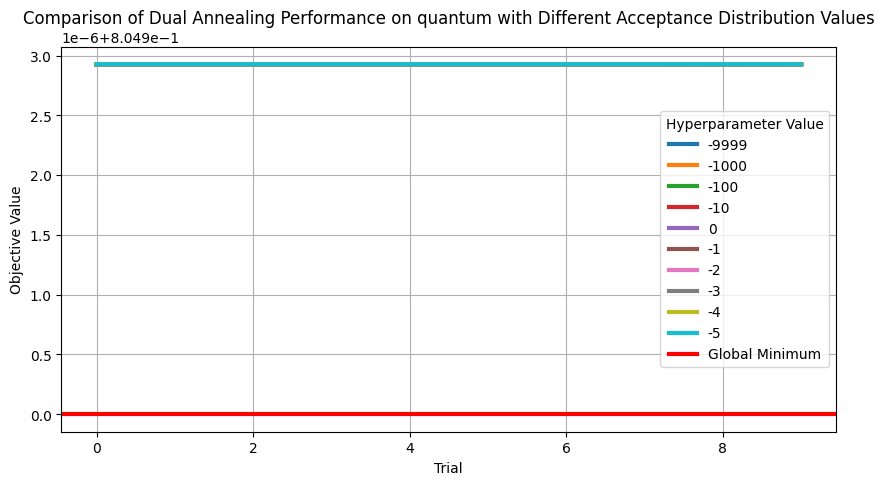

In [546]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
acpt_results[acpt_vals].plot(lw=3, figsize=(10, 5), ax=ax)
ax.axhline(global_minimum, color='red', lw=3, label='Global Minimum')

ax.set_title(
    f'Comparison of Dual Annealing Performance on {problem_name} with Different Acceptance Distribution Values'
)
ax.set_xlabel('Trial')
ax.set_ylabel('Objective Value')
ax.grid()
ax.legend(title='Hyperparameter Value')

fig.savefig(
    f'/home/seanschweiger/dl_testing/Deeplifting/images/dual_annealing/{problem_name}/acpt.png'
)